# Loading and prepering the data

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv("adult.csv")
data.dropna()
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Converting columns to categorical or int.

In [3]:
# List of columns to convert to categorical
cols_to_convert1 = ['workclass', 'education', 'marital-status', 'occupation',
                   'relationship', 'race', 'gender', 'native-country', 'income', 'educational-num']

# Convert specified columns to categorical type
data[cols_to_convert1] = data[cols_to_convert1].apply(lambda x: x.astype('category'))


In [4]:
# List of columns to convert to int
cols_to_convert2 = ['age', 'fnlwgt', 'capital-gain',
                   'capital-loss', 'hours-per-week']

# Convert specified columns to int type
data[cols_to_convert2] = data[cols_to_convert2].apply(lambda x: x.astype(int))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  category
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(10), int64(5)
memory usage: 2.3 MB


In [6]:
# Create a dictionary to store the contingency tables
contingency_tables = {}

# Generate contingency tables for each categorical column
for col in cols_to_convert1:
    contingency_tables[col] = data[col].value_counts()

# Display the contingency tables
for col, table in contingency_tables.items():
    print(f"Contingency Table for {col}:\n")
    print(table)
    print("\n")


Contingency Table for workclass:

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Contingency Table for education:

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


Contingency Table for marital-status:

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  category
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(10), int64(5)
memory usage: 2.3 MB


Aggregations of values in columns

In [8]:
data['workclass'] = data['workclass'].replace({'Local-gov': 'SL-gov', 'Federal-gov': 'SL-gov'})
data['workclass'] = data['workclass'].replace({'Self-emp-inc': 'Self-emp', 'Self-emp-not-inc': 'Self-emp'})
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp,5557
SL-gov,4568
?,2799
State-gov,1981
Without-pay,21
Never-worked,10


In [9]:
data['marital-status'] = data['marital-status'].replace({'Divorced' : 'Not-Married','Widowed': 'Not-Married'})
data['marital-status'] = data['marital-status'].replace({'Separated' : 'Married', 'Married-civ-spouse' : 'Married', 'Married-spouse-absent' : 'Married', 'Married-AF-spouse' : 'Married'})
data['marital-status'].value_counts()

,count
marital-status,
Married,24574
Never-married,16117
Not-Married,8151


In [10]:
# Replace specified values in the 'native.country' column
data['native-country'] = data['native-country'].replace({
    "United-States": "North-America", "Canada": "North-America", "Outlying-US(Guam-USVI-etc)": "North-America",
    "Mexico": "North-America", "Cuba": "North-America", "Jamaica": "North-America", "Haiti": "North-America",
    "Dominican-Republic": "North-America", "Guatemala": "North-America", "El-Salvador": "North-America",
    "Nicaragua": "North-America", "Trinadad&Tobago": "North-America", "Puerto-Rico": "North-America", "Honduras": "North-America",
    "England": "Europe", "Germany": "Europe", "Italy": "Europe", "Poland": "Europe", "Portugal": "Europe",
    "France": "Europe", "Yugoslavia": "Europe", "Scotland": "Europe", "Greece": "Europe",
    "Ireland": "Europe", "Hungary": "Europe", "Holand-Netherlands": "Europe",
    "Ecuador": "South-America", "Peru": "South-America", "Columbia": "South-America", "South": "South-America",
    "India": "Asia", "Iran": "Asia", "Philippines": "Asia", "Cambodia": "Asia",
    "Thailand": "Asia", "Laos": "Asia", "Taiwan": "Asia", "China": "Asia", "Japan": "Asia",
    "Vietnam": "Asia", "Hong": "Asia"
})

# Display unique values in the 'native-country' column
data['native-country'].value_counts()

,count
native-country,
North-America,45933
Asia,981
?,857
Europe,780
South-America,291


Replacing "?" with NA

In [11]:
# Replace "?" with NaN
data.replace("?", pd.NA, inplace=True)

# Display the table of missing values
missing_values_table = data.isna().sum()
print(missing_values_table)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


Removing NAs

In [12]:
data = data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45222 non-null  int64   
 1   workclass        45222 non-null  category
 2   fnlwgt           45222 non-null  int64   
 3   education        45222 non-null  category
 4   educational-num  45222 non-null  category
 5   marital-status   45222 non-null  category
 6   occupation       45222 non-null  category
 7   relationship     45222 non-null  category
 8   race             45222 non-null  category
 9   gender           45222 non-null  category
 10  capital-gain     45222 non-null  int64   
 11  capital-loss     45222 non-null  int64   
 12  hours-per-week   45222 non-null  int64   
 13  native-country   45222 non-null  category
 14  income           45222 non-null  category
dtypes: category(10), int64(5)
memory usage: 2.5 MB


Descriptive statistics of numerical values


In [14]:
# Display basic statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)


                age        fnlwgt  capital-gain  capital-loss  hours-per-week
count  45222.000000  4.522200e+04  45222.000000  45222.000000    45222.000000
mean      38.547941  1.897347e+05   1101.430344     88.595418       40.938017
std       13.217870  1.056392e+05   7506.430084    404.956092       12.007508
min       17.000000  1.349200e+04      0.000000      0.000000        1.000000
25%       28.000000  1.173882e+05      0.000000      0.000000       40.000000
50%       37.000000  1.783160e+05      0.000000      0.000000       40.000000
75%       47.000000  2.379260e+05      0.000000      0.000000       45.000000
max       90.000000  1.490400e+06  99999.000000   4356.000000       99.000000


Histograms

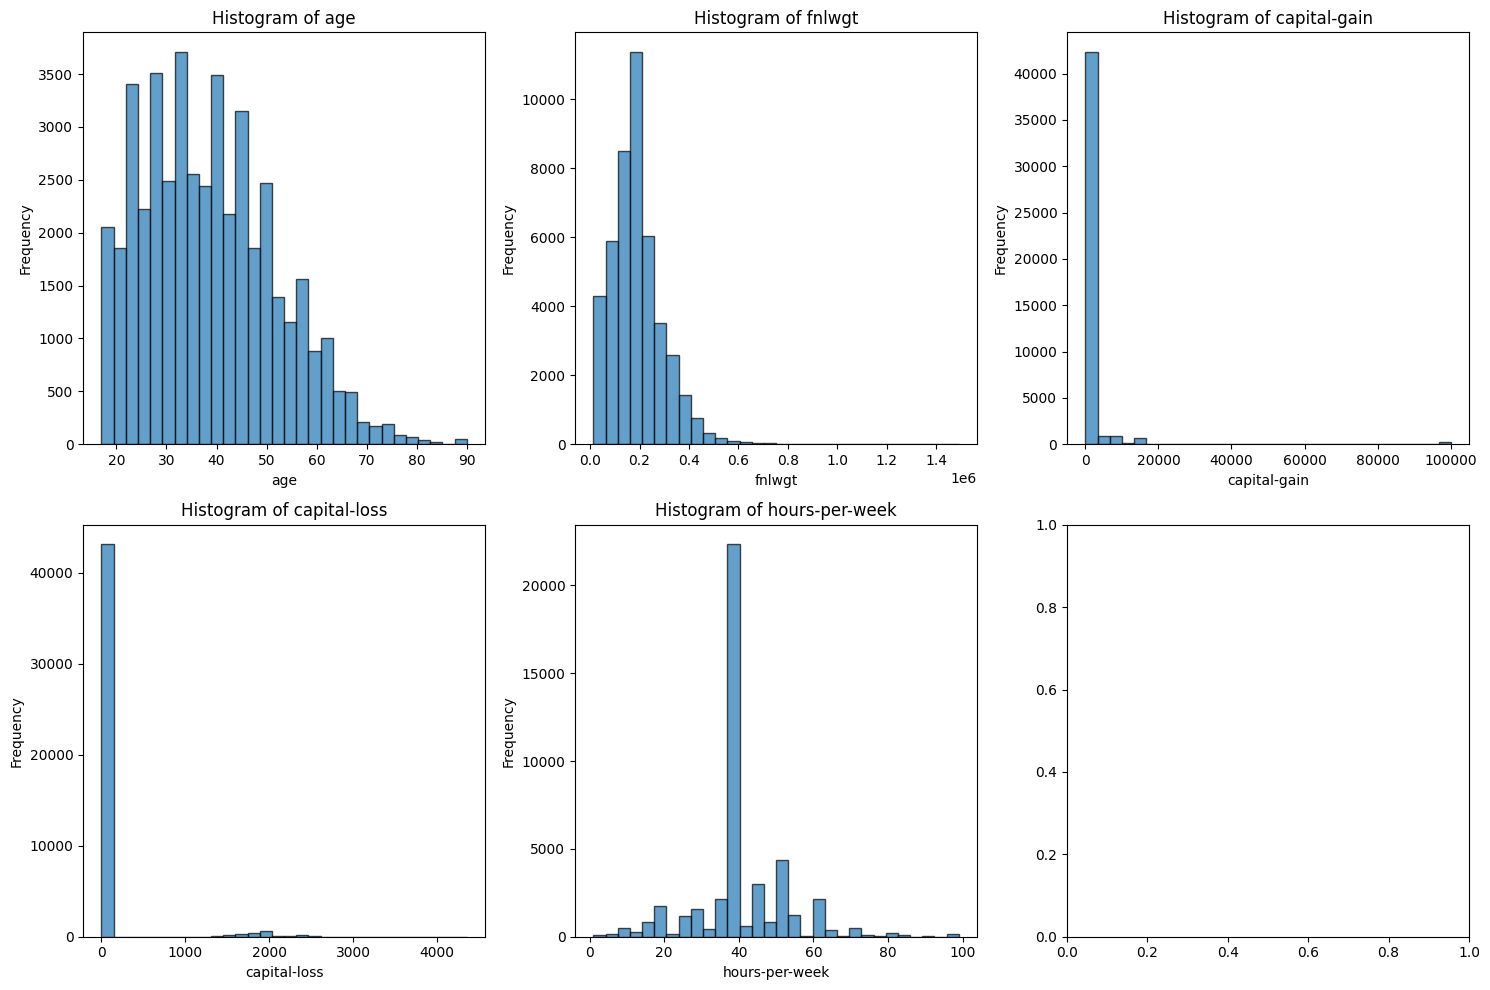

In [15]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Create histograms for each numerical column
for ax, col in zip(axes, numerical_columns):
    ax.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Removing outliner

In [16]:
# Find the maximum value in the 'capital-gain' column
max_value = data['capital-gain'].max()
print(max_value)

99999


In [17]:
# Remove rows with 'capital-gain' equal to 99999
data = data[data['capital-gain'] != 99999]

Splitting the data into traininf and testing set

In [18]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=123)
# Display the sizes of the training and testing sets
print(f"Training set size: {train.shape}")
print(f"Testing set size: {test.shape}")

Training set size: (35994, 15)
Testing set size: (8999, 15)


In [19]:
X_train = train.drop("income", axis=1)
y_train = train["income"]
X_test = test.drop("income", axis=1)
y_test = test["income"]

In [20]:


# One-hot encoding
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Train and test data transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Getting new names of features
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([encoded_feature_names, X_train.drop(columns=categorical_cols).columns])


print(f"Number of features after one-hot encoding: {X_train_transformed.shape[1]}")
print(f"Number of features names: {len(all_feature_names)}")


Number of features after one-hot encoding: 76
Number of features names: 76


## Creating models

Basic Logistic Regression model

In [21]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=123, max_iter= 10000)
logistic_model.fit(X_train_transformed, y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test_transformed)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print(f"Logistic Regression - Accuracy: {logistic_accuracy}")


Logistic Regression - Accuracy: 0.7880875652850317


Basic Random Forest model

In [22]:
# Random Forest Model
forest_model = RandomForestClassifier(random_state=123)
forest_model.fit(X_train_transformed, y_train)

# Predictions
forest_predictions = forest_model.predict(X_test_transformed)

# Evaluate the model
forest_accuracy = accuracy_score(y_test, forest_predictions)

print(f"Random Forest - Accuracy: {forest_accuracy}")


Random Forest - Accuracy: 0.8446494054894989


Basic Gradient Boosting model

In [23]:
# Gradient Boosting Model
boosting_model = GradientBoostingClassifier(random_state=123)
boosting_model.fit(X_train_transformed, y_train)

# Predictions
boosting_predictions = boosting_model.predict(X_test_transformed)

# Evaluate the model
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

print(f"Boosting Trees - Accuracy: {boosting_accuracy}")


Boosting Trees - Accuracy: 0.8597621957995333


Using RFECV (Recursive Feature Elimination with Cross-Validation) to choose best features for our models. It recursivly eliminates features untill we get the best accuracy for our model. It is combined with cross-validaiton to get more statisticlly significant results.

In [24]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=123, max_iter=10000)

# Initialize RFECV with the logistic regression model
rfecv_logistic = RFECV(estimator=logistic_model, step=1, cv=StratifiedKFold(3), scoring='accuracy')

# Fit RFECV
rfecv_logistic.fit(X_train_transformed, y_train)

# Print the optimal number of features and the selected features
print(f"Optimal number of features for Logistic Regression: {rfecv_logistic.n_features_}")
selected_features_logistic = all_feature_names[rfecv_logistic.support_]
print(f"Selected features: {selected_features_logistic}")

# Train the logistic regression model with selected features
logistic_model.fit(X_train_transformed[:, rfecv_logistic.support_], y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test_transformed[:, rfecv_logistic.support_])

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Optimized Logistic Regression - Accuracy: {logistic_accuracy}")


Optimal number of features for Logistic Regression: 67
Selected features: ['workclass_Private' 'workclass_SL-gov' 'workclass_Self-emp'
 'workclass_State-gov' 'education_10th' 'education_11th' 'education_12th'
 'education_1st-4th' 'education_5th-6th' 'education_7th-8th'
 'education_9th' 'education_Assoc-acdm' 'education_Assoc-voc'
 'education_Bachelors' 'education_Doctorate' 'education_HS-grad'
 'education_Masters' 'education_Prof-school' 'education_Some-college'
 'educational-num_2' 'educational-num_3' 'educational-num_4'
 'educational-num_5' 'educational-num_6' 'educational-num_7'
 'educational-num_8' 'educational-num_9' 'educational-num_10'
 'educational-num_11' 'educational-num_12' 'educational-num_13'
 'educational-num_14' 'educational-num_15' 'educational-num_16'
 'marital-status_Married' 'marital-status_Never-married'
 'marital-status_Not-Married' 'occupation_Adm-clerical'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-c

In [26]:
# Initialize the random forest model
forest_model = RandomForestClassifier(random_state=123)

# Initialize RFECV with the random forest model
rfecv_forest = RFECV(estimator=forest_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV
rfecv_forest.fit(X_train_transformed, y_train)

# Print the optimal number of features and the selected features
print(f"Optimal number of features for Random Forest: {rfecv_forest.n_features_}")
selected_features_forest = all_feature_names[rfecv_forest.support_]
print(f"Selected features: {selected_features_forest}")

# Train the random forest model with selected features
forest_model.fit(X_train_transformed[:, rfecv_forest.support_], y_train)

# Predictions
forest_predictions = forest_model.predict(X_test_transformed[:, rfecv_forest.support_])

# Evaluate the model
forest_accuracy = accuracy_score(y_test, forest_predictions)
print(f"Optimized Random Forest - Accuracy: {forest_accuracy}")


Optimal number of features for Random Forest: 67
Selected features: ['workclass_Private' 'workclass_SL-gov' 'workclass_Self-emp'
 'workclass_State-gov' 'education_10th' 'education_11th' 'education_12th'
 'education_5th-6th' 'education_7th-8th' 'education_9th'
 'education_Assoc-acdm' 'education_Assoc-voc' 'education_Bachelors'
 'education_Doctorate' 'education_HS-grad' 'education_Masters'
 'education_Prof-school' 'education_Some-college' 'educational-num_4'
 'educational-num_5' 'educational-num_6' 'educational-num_7'
 'educational-num_9' 'educational-num_10' 'educational-num_11'
 'educational-num_12' 'educational-num_13' 'educational-num_14'
 'educational-num_15' 'educational-num_16' 'marital-status_Married'
 'marital-status_Never-married' 'marital-status_Not-Married'
 'occupation_Adm-clerical' 'occupation_Craft-repair'
 'occupation_Exec-managerial' 'occupation_Farming-fishing'
 'occupation_Handlers-cleaners' 'occupation_Machine-op-inspct'
 'occupation_Other-service' 'occupation_Prof-sp

In [27]:
# Initialize the gradient boosting model
boosting_model = GradientBoostingClassifier(random_state=123)

# Initialize RFECV with the gradient boosting model
rfecv_boosting = RFECV(estimator=boosting_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV
rfecv_boosting.fit(X_train_transformed, y_train)

# Print the optimal number of features and the selected features
print(f"Optimal number of features for Gradient Boosting: {rfecv_boosting.n_features_}")
selected_features_boosting = all_feature_names[rfecv_boosting.support_]
print(f"Selected features: {selected_features_boosting}")

# Train the gradient boosting model with selected features
boosting_model.fit(X_train_transformed[:, rfecv_boosting.support_], y_train)

# Predictions
boosting_predictions = boosting_model.predict(X_test_transformed[:, rfecv_boosting.support_])

# Evaluate the model
boosting_accuracy = accuracy_score(y_test, boosting_predictions)
print(f"Optimized Gradient Boosting - Accuracy: {boosting_accuracy}")


Optimal number of features for Gradient Boosting: 28
Selected features: ['education_10th' 'education_11th' 'education_Bachelors'
 'education_Doctorate' 'education_HS-grad' 'education_Masters'
 'education_Prof-school' 'educational-num_4' 'educational-num_5'
 'educational-num_9' 'educational-num_13' 'educational-num_14'
 'educational-num_15' 'educational-num_16' 'marital-status_Married'
 'occupation_Exec-managerial' 'occupation_Farming-fishing'
 'occupation_Other-service' 'occupation_Prof-specialty' 'occupation_Sales'
 'occupation_Tech-support' 'relationship_Husband' 'relationship_Wife'
 'gender_Female' 'age' 'capital-gain' 'capital-loss' 'hours-per-week']
Optimized Gradient Boosting - Accuracy: 0.8586509612179131


## Evaluation

We evaluate models with metrics such as: accuracy, reccal, precision, sensitivity, specifity, AUC and ROC curve.

In [28]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)


In [29]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {roc_auc}")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


--- Logistic Regression ---
Accuracy: 0.8283142571396822
Precision: 0.6907333712336555
Recall: 0.5482851985559567
Specificity: 0.9197994987468672
F1 Score: 0.6113207547169812
AUC: 0.8832153182382585


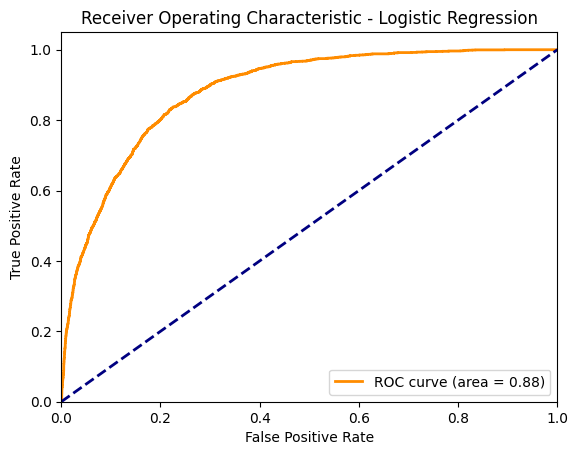

In [30]:
logistic_probabilities = logistic_model.predict_proba(X_test_transformed[:, rfecv_logistic.support_])[:, 1]
evaluate_model(y_test, logistic_predictions, logistic_probabilities, "Logistic Regression")


Accuracy = 0.83 means that 83% of ours predicions were real. It is good number but when we look at the other metrics such as reccal we can see result = 0.55. It means that we truly identified only 55% of real class 1 cases. We have hight result of accuracy because there are a lot more cases of class 0 in our data and our model usually predict it as class 0. AUC 0.88 is a good result, it means that our model have ability to determine wheather case belongs to class 0 or class 1. Using RFECV clearly improved this model from basic Logistic model.

--- Random Forest ---
Accuracy: 0.8444271585731749
Precision: 0.717948717948718
Recall: 0.6064981949458483
Specificity: 0.9221583370190182
F1 Score: 0.6575342465753424
AUC: 0.8972451701562252


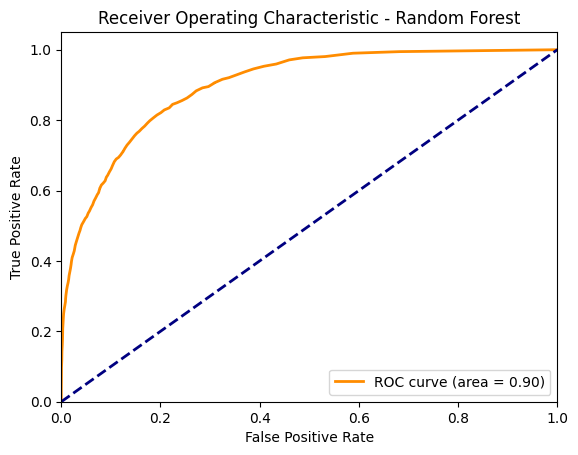

In [31]:
forest_probabilities = forest_model.predict_proba(X_test_transformed[:, rfecv_forest.support_])[:, 1]
evaluate_model(y_test, forest_predictions, forest_probabilities, "Random Forest")


Even though, RFECV didnt improve this model much, it is better that Logistic. Accuracy 0.84 isn't much higher but Recall is as 61%.

--- Gradient Boosting ---
Accuracy: 0.8586509612179131
Precision: 0.7968553459119497
Recall: 0.5717509025270758
Specificity: 0.9523809523809523
F1 Score: 0.6657908565423016
AUC: 0.9153598119848357


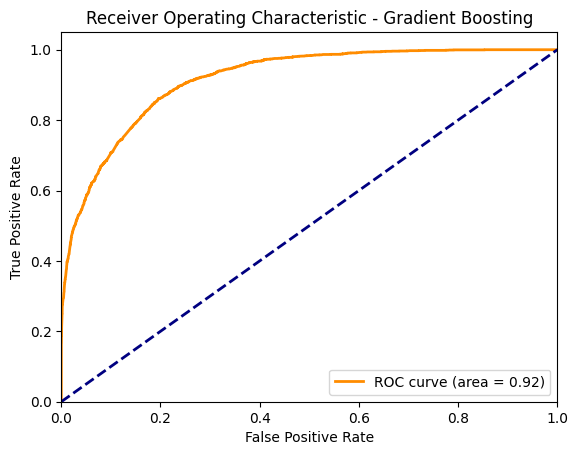

In [32]:
boosting_probabilities = boosting_model.predict_proba(X_test_transformed[:, rfecv_boosting.support_])[:, 1]
evaluate_model(y_test, boosting_predictions, boosting_probabilities, "Gradient Boosting")


Accuracy is the highest in this model (0.86) but Recall (0.57) is worse that in Random Forest model. AUC is better so is ROC curve.

Choosing best model is hard here. It depends on what we really want to achive. If our main goal is to predict class 1 properly, then I would choose Random Forest model but if we want overall accuracy then Boosting Trees model will be better.